# Laboratório de Raizes de Equações

Nesta aula, iremos implementar métodos para encontrar raízes de equações, polinomiais ou não.

Antes de mais nada, precisamos criar métodos para resolver um polinomio dado um valor de X. Um polinômio pode ser representado como um vetor de coeficientes. Por exemplo, um polinômio $3x^4-6x^3+4x^2-29$ poderia ser representado por:

In [1]:
import numpy as np
pol = np.array([-29,0,4,-6,3])

De posse de um polinômio, é importante ter uma função que calcule o valor do polinômio para um valor de X qualquer:

In [2]:
def resolve(coef, x) :
    acm = 0
    for i in range(len(coef)) :
        acm += coef[i] * (pow(x,i))
    return acm

resolve(pol, 1)

-28

Outra coisa importante pode ser uma função para calcular a derivada de um polinômio (isto pode ser útil para calcular a multiplicidade de uma raiz:

In [3]:
d = np.zeros(len(pol-1)) #cria-se um vetor com uma posição a menos do que o coef porque o coef com indice 0 
                        #será anulado
    
def deriva(coef) :
    v = np.zeros((len(coef) - 1))
    for i in range(1,len(coef)) :
        v[i - 1] = coef[i] * i
    return v
    
def multiplicidade(coef,raiz) :
    v = coef
    multi = 0
    while (resolve(v,raiz) == 0) and (len(v) > 0) : #esse len foi adicionado para que não se derive um caso vazio
        v = deriva(v)
        multi += 1
    return multi

deriva(pol)

array([  0.,   8., -18.,  12.])

Teste seu código com a multiplicidade da raiz 1 no seguinte polinômio: $x^4+2x^3-12x^2+14x-5$:

In [4]:
p = np.array([-5,14,-12,2,1])
np.flip(p,axis = 0)
#print(multiplicidade(p,1))

array([  1,   2, -12,  14,  -5])

Outro fator importante para encontrar as raízes de uma equação algébrica é o uso do teorema de Lagrange para encontrar os limites das raízes positivas e das negativas. Faça uma função que calcule o valor de Lagrange para um polinômio e outra que, dada os coeficientes de uma equação algébrica, retorne os quatro limites:

In [5]:
def indicePrimeiroNeg(coef):
    for i in range((len(coef) - 1), -1, -1):
        if coef[i] < 0 :
            return i

def lagrange(coef):
    if coef[-1] < 0 :
        coef *= (-1)
    return (1 + ((-1 * min(coef))/coef[-1])**(1.0/((len(coef) - 1) - indicePrimeiroNeg(coef))))

pol = np.array([-12,20,-1,-9,3,1])
lagrange(pol)

4.464101615137754

In [6]:
def inverteIndiceImpar(coef):
    cop = coef.copy() #se eu não copiar o vetor e alterar a 'cópia' ele vai alterar o vetor original e dar valores alterados
    for i in range(0, len(coef)):
        if (i % 2) != 0 :
            cop[i] *= (-1)
    return cop

def limiteSupPos(coef): # 4,46
    return lagrange(coef)

def limiteInfPos(coef): #1/2,6 = 0,38
    return (1/(lagrange(np.flip(coef,axis = 0))))

def limiteSupNeg(coef): # -1,90
    return ((-1) * lagrange(inverteIndiceImpar(np.flip(coef, axis = 0))))

def limiteInfNeg(coef):#-1/10 = -0,1
    return (-1/(lagrange(inverteIndiceImpar(coef))))

def limites(coef):
    return (limiteInfNeg(coef), limiteSupNeg(coef), limiteInfPos(coef), limiteSupPos(coef))

pol = np.array([-12,20,-1,-9,3,1])
limites(pol)
#inverteIndiceImpar(pol)

(-0.1, -1.90856029641607, 0.37499999999999994, 4.464101615137754)

Verifique o funcionamento das suas funções criadas para o polinomio: $-x^4-2x^3+12x^2-14x+5$

In [7]:
p = np.array([-12,20,-1,-9,3,1])
limiteSupNeg(p)

-1.90856029641607

Outro fator importante é a regra de sinal de descartes. Faça uma função que retorne o número de raízes positivas e negativas (se não puder precisar o número de negativas, retorne -1):

In [17]:
def nraizes(coef):
    npos = nneg = 0
    
    for i in range(len(coef)) :
        if (coef[i] == 0) : #se um dos coef forem = 0 não é possível saber o número de raízes negativas que o polinômio tem
            nneg = (-1)

    for i in range(len(coef) - 1) :
        if ((coef[i] * coef[(i + 1)]) < 0) :
            npos += 1
        elif nneg != (-1) :
            nneg += 1
            
    return (npos,nneg)

nraizes(p)

(3, -1)

Para a função $x^5-2x^4+x^3-2x^2+5$ e para $x^3-3x^2-6x+8$ ache o intervalo das raizes positivas e negativas, o número de raízes de cada tipo e plote um grafico para valores desde o limite inferior negativo até o limite superior positivo:

(-0.42021579853989566, -1.632455532033676, 0.6125741132772068, 3.0)
(3, -1)


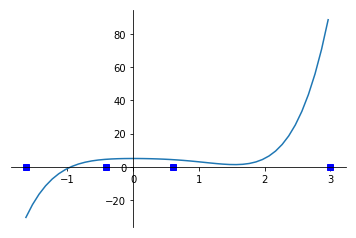

In [15]:
import matplotlib.pyplot as plt
p = np.array([5,0,-2,1,-2,1])
print(limites(p))
print(nraizes(p))

ax = plt.gca()
ax.spines['right'].set_color('none') #borda do gráfico do lado direito não é mostrado
ax.spines['top'].set_color('none') #borda do gráfico do lado esquerdo não é mostrado
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

lim = limites(p)
x = np.arange(lim[1], lim[3], 0.1)
plt.plot(x,resolve(p,x)) #x,y,estilo
plt.plot(lim[0],0,'bs',lim[1],0,'bs',lim[2],0,'bs',lim[3],0,'bs')
plt.show()

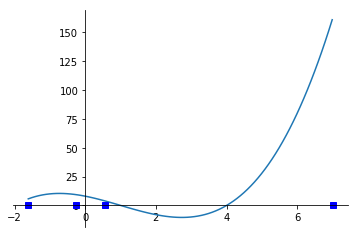

In [10]:
p1 = np.array([8,-6,-3,1])

ax = plt.gca()
ax.spines['right'].set_color('none') #borda do gráfico do lado direito não é mostrado
ax.spines['top'].set_color('none') #borda do gráfico do lado esquerdo não é mostrado
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

lim = limites(p1)
x = np.arange(lim[1], lim[3], 0.1)
plt.plot(x,resolve(p1,x)) #x,y,estilo
plt.plot(lim[0],0,'bs',lim[1],0,'bs',lim[2],0,'bs',lim[3],0,'bs')
plt.show()

Faça um programa que receba uma equação transcendente (na forma de função) e um ponto e tente descobrir um intervalo com uma raiz (slide 80 de isolamento de raízes):

In [16]:
def achaIntervalo(f,z): #Voce pode rodar a função aqui dentro chamando f(x)
    a = b = 0
    
    if (z == 0) :
        a = (-0.05)
        b = 0.05
    else :
        a = (0.95 * z)
        b = (1.05 * z)
    
    ya = f(a)
    yb = f(b)
    
    while ((ya * yb) > 0):
        if (ya > yb) :
            b = b * 1.05
        else :
            a = b * 0.95

    return (a,b) #intervalo

Teste seu método com a função abaixo:

In [12]:
def func1(x):
    return np.sin(x**2)
achaIntervalo(func1, 2.5)

(2.375, 2.625)

Agora vamos implementar a bissecção. O método da bissecção recebe como parametro uma função e um intervalo, e encontra uma raiz neste intervalo usando uma busca binária. O método pode ter três critérios de parada:

- Número de Iterações
- Proximidade da raiz
- Proximidade entre iterações.

Aqui vamos implementar **os três**

In [13]:
def bissecao(f,a,b, niter = 1000,minimo = 0.000001, proximidadeIter = 0.000001) : # f de parametros é uma função
    ant = 0
    i = 0
    for i in range(niter) :
        xchute = (a + b)/2
        ychute = f(xchute)
        fb = f(b)
        if (np.abs(ychute) < 0.000001) or (np.abs(ychute-ant) <= proximidadeIter) or (fb * ychute == 0) :
            break
        elif ((fb * ychute) > 0) :
            b = xchute
        else :
            a = xchute
        ant = ychute
    return xchute

Agora vamos testar nosso método da bissecção com a função $e^x-x-2$ para o intervalo [-30,-1]:

In [14]:
def funcao(x):
    return (np.exp(x) - x - 2)
bissecao(funcao, -30,-1) #como chamar função no parametro

-1.8414057493209839